<a href="https://colab.research.google.com/github/SrushtiRatnaparkhi/indicators-/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
!pip install yfinance
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
stock = yf.Ticker("AAPL")
stock_info = stock.info
print("Stock Information:")
print(stock_info)

historical_data = stock.history(period="1y")
print("Historical Data:")
print(historical_data)

df = pd.DataFrame(historical_data)


Stock Information:
{'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '408 996 1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, a

In [ ]:
stock_new = historical_data[['Close', 'Open', 'Low', 'High']].copy()
print(stock_new)

                                Close        Open         Low        High
Date                                                                     
2023-01-25 00:00:00-05:00  141.071472  140.106863  138.038423  141.638296
2023-01-26 00:00:00-05:00  143.159821  142.374203  141.111258  143.448202
2023-01-27 00:00:00-05:00  145.118835  142.364244  142.284686  146.411612
2023-01-30 00:00:00-05:00  142.205154  144.154267  142.055994  144.740984
2023-01-31 00:00:00-05:00  143.487961  141.906802  141.489139  143.537686
...                               ...         ...         ...         ...
2024-01-19 00:00:00-05:00  191.559998  189.330002  188.820007  191.949997
2024-01-22 00:00:00-05:00  193.889999  192.300003  192.259995  195.330002
2024-01-23 00:00:00-05:00  195.179993  195.020004  193.830002  195.750000
2024-01-24 00:00:00-05:00  194.500000  195.419998  194.339996  196.380005
2024-01-25 00:00:00-05:00  195.970001  195.220001  194.634995  196.267502

[252 rows x 4 columns]


In [ ]:

column_for_sma = 'Close'
sma_window = 30
historical_data[f'{sma_window}-day SMA'] = historical_data[column_for_sma].rolling(window=sma_window).mean()


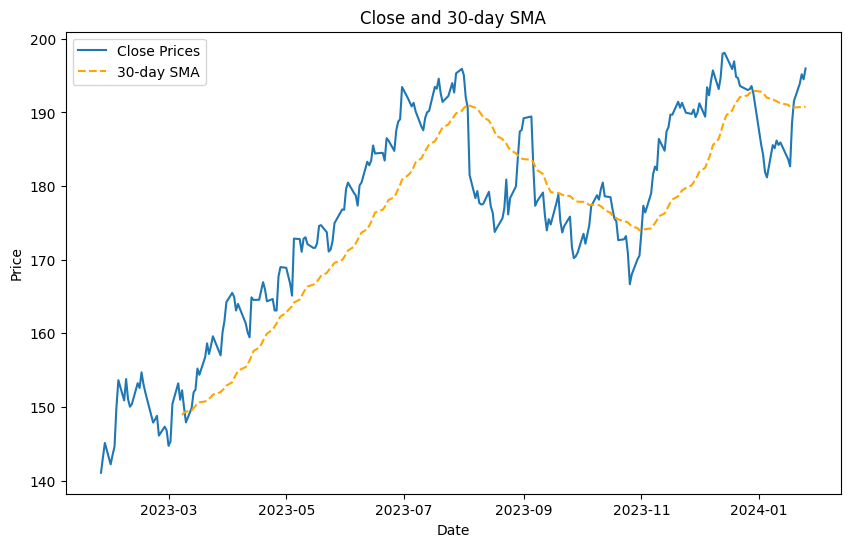

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(historical_data[column_for_sma], label='Close Prices')
plt.plot(historical_data[f'{sma_window}-day SMA'], label=f'{sma_window}-day SMA', linestyle='--', color='orange')
plt.title(f'{column_for_sma} and {sma_window}-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:

column_for_ema = 'Close'
ema_window = 30
historical_data[f'{ema_window}-day EMA'] = historical_data[column_for_ema].ewm(span=ema_window, adjust=False).mean()

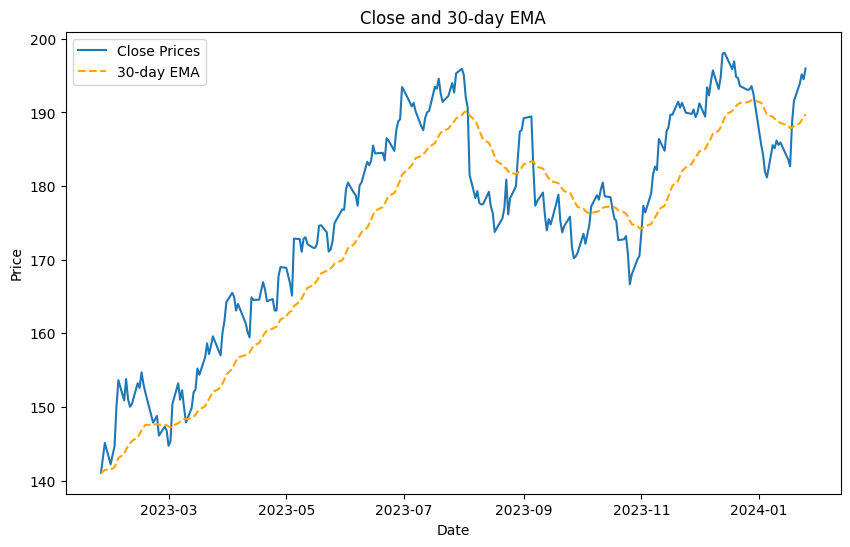

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(historical_data[column_for_sma], label='Close Prices')
plt.plot(historical_data[f'{ema_window}-day EMA'], label=f'{ema_window}-day EMA', linestyle='--', color='orange')
plt.title(f'{column_for_ema} and {ema_window}-day EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
rsi_period=14

In [ ]:
df['gain']=(df['Close']-df['Open']).apply(lambda z:z if z>0 else 0)
df['loss']=(df['Close']-df['Open']).apply(lambda z:z if z<0 else 0)
#case sensitive  coloumn names

In [ ]:
print("Column Names:")
print(historical_data.columns)

Column Names:
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       '30-day SMA', '30-day EMA', 'gain', 'loss'],
      dtype='object')


In [ ]:
df['ema_gain']=df['gain'].ewm(span=rsi_period,min_periods=rsi_period).mean()
df['ema_loss']=df['loss'].ewm(span=rsi_period,min_periods=rsi_period).mean()


In [ ]:
df['rsi']=df['ema_gain']/df['ema_loss']

In [ ]:
df['rsi']=100-(100/(df['rsi']+1))

In [ ]:
display(df['rsi'])

Date
2023-01-25 00:00:00-05:00           NaN
2023-01-26 00:00:00-05:00           NaN
2023-01-27 00:00:00-05:00           NaN
2023-01-30 00:00:00-05:00           NaN
2023-01-31 00:00:00-05:00           NaN
                                ...    
2024-01-19 00:00:00-05:00    126.137515
2024-01-22 00:00:00-05:00    120.873158
2024-01-23 00:00:00-05:00    120.396210
2024-01-24 00:00:00-05:00    141.911463
2024-01-25 00:00:00-05:00    135.880171
Name: rsi, Length: 252, dtype: float64

[*********************100%%**********************]  1 of 1 completed


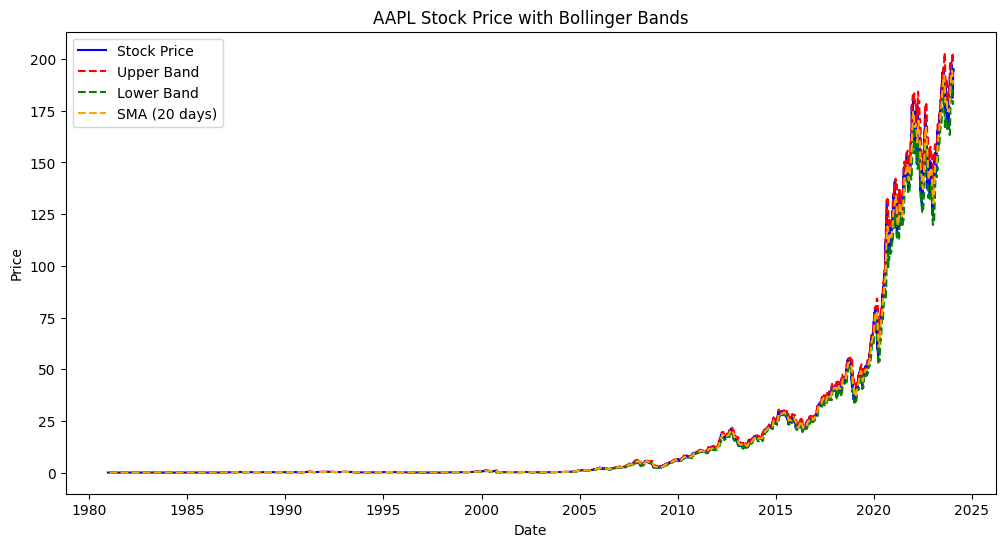

In [ ]:


#  yf.download(["AAPL"])   to download historical data for the stock




# Fetch historical stock prices
stock = "AAPL"
prices = yf.download([stock])["Adj Close"]

def bollinger_bands(prices, window=20, num_of_std=2):
    rolling_mean = prices.rolling(window).mean()
    rolling_std = prices.rolling(window).std()
    upper_band = rolling_mean + (rolling_std * num_of_std)
    lower_band = rolling_mean - (rolling_std * num_of_std)
    return rolling_mean, upper_band, lower_band

# Calculate Bollinger Bands
rolling_mean, upper_band, lower_band = bollinger_bands(prices)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Stock Price', color='blue')
plt.plot(upper_band, label='Upper Band', color='red', linestyle='--')
plt.plot(lower_band, label='Lower Band', color='green', linestyle='--')
plt.plot(rolling_mean, label='SMA (20 days)', color='orange', linestyle='--')
plt.title(f'{symbol} Stock Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
!pip install pandas_ta

import pandas_ta as ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=3f6ae48760ff9551425ab2210517df2d6e2f6eaf1285cd615f29e0c10d91587a
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
def generate_signals(data, short_window=40, long_window=100, rsi_window=14):
    # Calculate short and long-term EMAs
    data['Short_EMA'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['Long_EMA'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['Signal'] = 0  # 0 for no signal
    data['RSI'] = talib.RSI(data['Close'], timeperiod=rsi_window)
    data['Signal'][short_window:] = np.where((data['Short_EMA'][short_window:] > data['Long_EMA'][short_window:]) & (data['RSI'][short_window:] < 30), 1, 0)
    data['Signal'][short_window:] = np.where((data['Short_EMA'][short_window:] < data['Long_EMA'][short_window:]) & (data['RSI'][short_window:] > 70), -1, 0)

    return data
#Exponential Moving Averages (EMAs) for a given DataFrame data using the 'Close' prices.

40, 100, and 14 are commonly used as default values for the parameters short_window, long_window, and rsi_window


When adjust=False, it doesn't make this adjustment. Each data point in the window is treated equally, making the calculation simpler and faster. It's like a straightforward average without considering the decreasing influence of older data.

In [ ]:

def generate_signals(data, short_window=40, long_window=100, rsi_window=14):
   data['PnL'] = data['Signal'].shift(1) * data['Daily_Return']

    return data


    #This line generates buy signals (1) when the short-term EMA is greater than the long-term EMA and the RSI is less than 30.
#The np.where function is used to conditionally assign values. If the conditions are met, it assigns 1; otherwise, it assigns 0.
#The indexing [short_window:] ensures that signals are generated only after the short-term EMA has enough data points.


IndentationError: unexpected indent (<ipython-input-39-1a2ab6ed8052>, line 4)

compounding approach
 Portfolio Value = Initial Capital * Cumulative Product(1 + Daily Returns)

Daily return is calculated by subtracting the opening price from the closing price

In [ ]:
def calculate_daily_returns(data):
    data['Daily_Returns'] = data['Close'].pct_change()
    return data
def calculate_portfolio_value(data, initial_capital=100000):
    data['Cumulative_Returns'] = (1 + data['Daily_Returns']).cumprod()
    data['Portfolio_Value_Compounding'] = initial_capital * data['Cumulative_Returns']
    return data
historical_data = calculate_daily_returns(historical_data)
historical_data = calculate_portfolio_value(historical_data)
print(historical_data[['Close', 'Daily_Returns', 'Cumulative_Returns', 'Portfolio_Value_Compounding']])

                                Close  Daily_Returns  Cumulative_Returns  \
Date                                                                       
2023-01-25 00:00:00-05:00  141.071472            NaN                 NaN   
2023-01-26 00:00:00-05:00  143.159821       0.014803            1.014803   
2023-01-27 00:00:00-05:00  145.118835       0.013684            1.028690   
2023-01-30 00:00:00-05:00  142.205154      -0.020078            1.008036   
2023-01-31 00:00:00-05:00  143.487961       0.009021            1.017130   
...                               ...            ...                 ...   
2024-01-19 00:00:00-05:00  191.559998       0.015533            1.357893   
2024-01-22 00:00:00-05:00  193.889999       0.012163            1.374410   
2024-01-23 00:00:00-05:00  195.179993       0.006653            1.383554   
2024-01-24 00:00:00-05:00  194.500000      -0.003484            1.378734   
2024-01-25 00:00:00-05:00  195.970001       0.007558            1.389154   

           

non compounding approach,Portfolio Value = Initial Capital * (1 + Cumulative Returns)

In [ ]:
def calculate_daily_returns(data):
    data['Daily_Returns'] = data['Close'].pct_change()
    data['Cumulative_Returns'] = (1 + data['Daily_Returns']).cumprod() - 1
    return data
def calculate_portfolio_value(data, initial_capital=100000):
    data['Cumulative_Returns'] = (1 + data['Daily_Returns']).cumprod() - 1
    data['Portfolio_Value_non_Compounding'] = initial_capital * (1 + data['Cumulative_Returns'])
    return data
historical_data = calculate_daily_returns(historical_data)
historical_data = calculate_portfolio_value(historical_data)
print(historical_data[['Close', 'Daily_Returns', 'Cumulative_Returns', 'Portfolio_Value_non_ompounding']])


KeyError: "['Portfolio_Value_non_ompounding'] not in index"

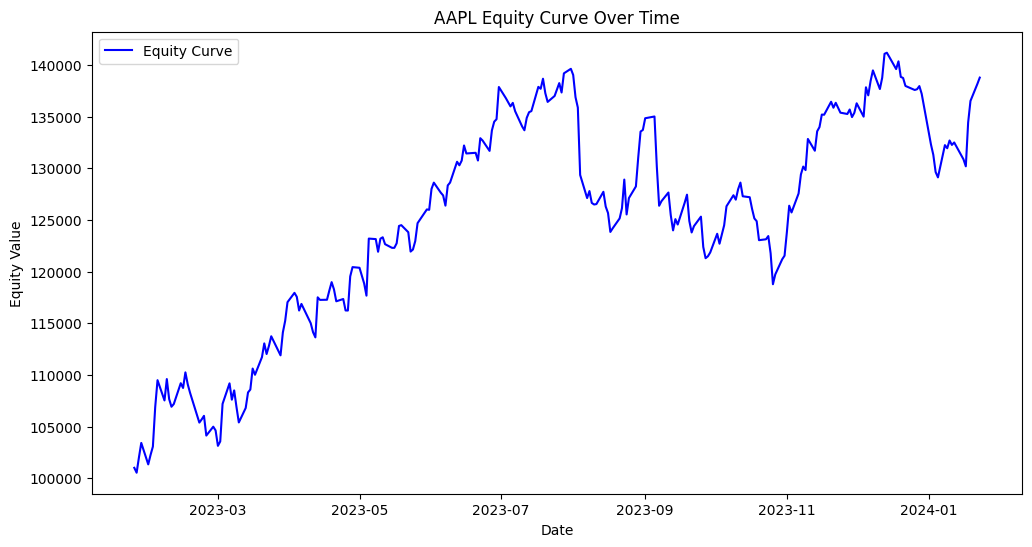

In [ ]:
#plot equilty curve
plt.figure(figsize=(12, 6))
plt.plot(historical_data['Portfolio_Value_Compounding'], label='Equity Curve', color='blue')

plt.title(f'{symbol} Equity Curve Over Time')
plt.xlabel('Date')
plt.ylabel('Equity Value')
plt.legend()
plt.show()

Cumulative Return = (1+Return t ) ×Cumulative Return t-1

Previous Peak  t = max(Cumulative Return 1 ,Cumulative Return 2...,Cumulative Return t)

Drawdown t =( cumulative return t - previous peak t ) / previous peak t



 cumulative product of an array is calculated by multiplying each element by the product of all previous elements.




                                 Open        High         Low       Close  \
Date                                                                        
2023-01-24 00:00:00-05:00  139.530101  142.364266  139.520162  141.737762   
2023-01-25 00:00:00-05:00  140.106878  141.638311  138.038437  141.071487   
2023-01-26 00:00:00-05:00  142.374188  143.448187  141.111243  143.159805   
2023-01-27 00:00:00-05:00  142.364258  146.411628  142.284701  145.118851   
2023-01-30 00:00:00-05:00  144.154251  144.740968  142.055979  142.205139   
...                               ...         ...         ...         ...   
2024-01-18 00:00:00-05:00  186.089996  189.139999  185.830002  188.630005   
2024-01-19 00:00:00-05:00  189.330002  191.949997  188.820007  191.559998   
2024-01-22 00:00:00-05:00  192.300003  195.330002  192.259995  193.889999   
2024-01-23 00:00:00-05:00  195.020004  195.750000  193.830002  195.179993   
2024-01-24 00:00:00-05:00  195.419998  196.380005  194.664993  195.289993   

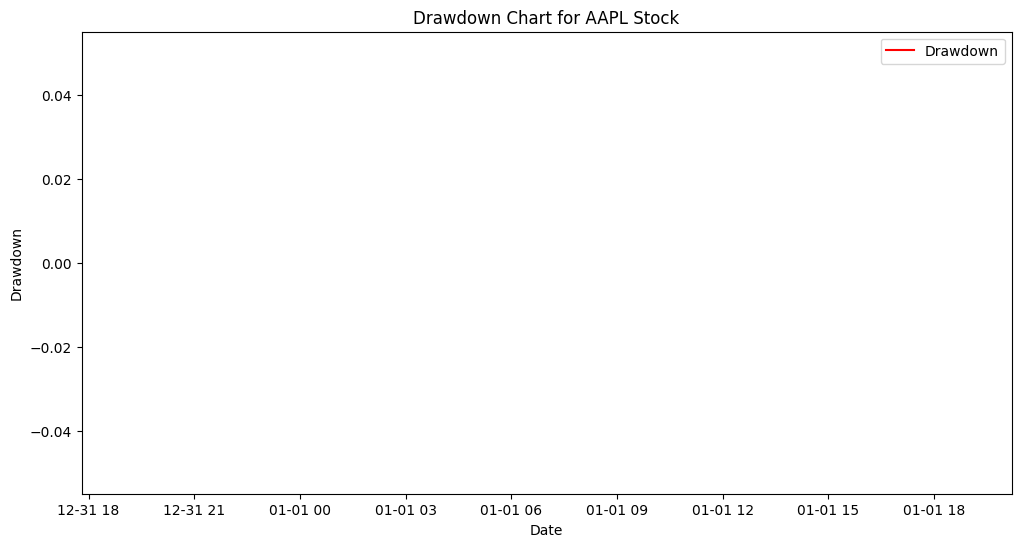

In [ ]:
df = pd.DataFrame(historical_data)

df['cumulative_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
previous_peaks = np.maximum.accumulate(df['cumulative_Returns'])
df['Drawdown'] = (df['cumulative_Returns'] - previous_peaks) / (1 + previous_peaks)
print(df)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Drawdown'], label='Drawdown', color='red')
plt.title('Drawdown Chart for AAPL Stock')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()
